## Matrices
* Classic Notation
* Matrices as Linear Equations
* Ploting a Matrix as Vectors
* Matrix Operations
    - Addition of two matrices of the same size
    - Scalar Multiplication
    - Matrix Multiplication
* Linear Transformation
* Determinant
* Rank of a Matrix
* Row Echolon Form
* Singular
* Transpose of Matrix
* Inverse of Matrix
* Eigenvector & Eigenvalue

### Classic Notation
A classic notation of a mxn matrix:

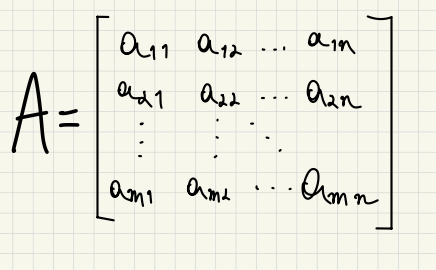



### Matrices as Linear Equations

Linear Equations can always be represented by a matrix:

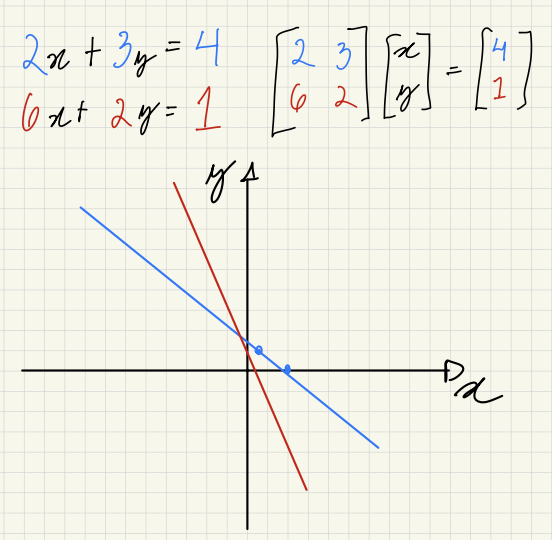

2D equations can easily be solved visually.



### Matrices as Vectors
Another way to visualize a matrix is as vectors.

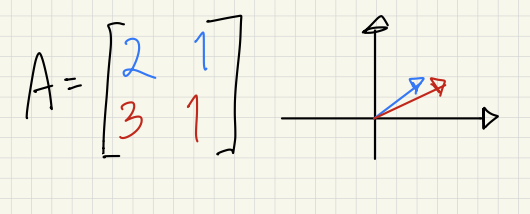


### Matrix Operations
- Addition of two matrices of the same size
- Scalar Multiplication
- Matrix Multiplication

**Addition**

Given two matrices with same dimensions, the sum of the two matrices will have each element as the sum of elements at the corresponding positions:

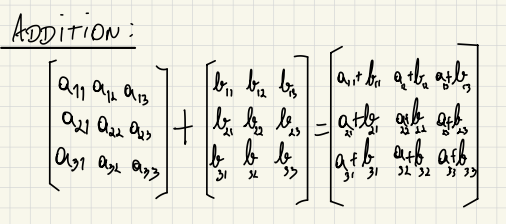

In [1]:
import numpy as np
A = np.array([[1,2],[2,4]])
B = np.array([[10,1],[5,3]])
print(A+B)

[[11  3]
 [ 7  7]]


**Scalar Multiplication**

Multiplying a matrix by a scalar will result in a matrix with same dimension, each element will be multiplied:

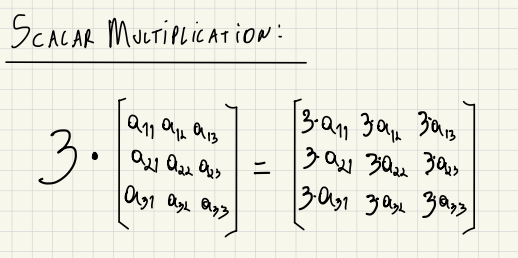


In [2]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(3*A)

[[ 3  6  9]
 [12 15 18]
 [21 24 27]]


Scalar Addition will work in the same manner, adding 3 to a matrix will result in a new matrix with each element added 3.

**Matrix Multiplication**

Matrix multiplication is less trivial than the other operations, each element will be the sum of multiplication of corresponding elements of each row of the first matrix by the corresponding elements of each column of the second matrix:

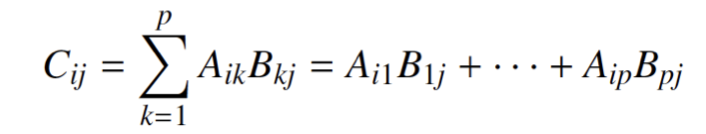

The resulting matrix has the same number of rows as the first matrix and the same number of columns as the second matrix. The number of columns in the first matrix must be equal to the number of rows in the second matrix for matrix multiplication to be possible.

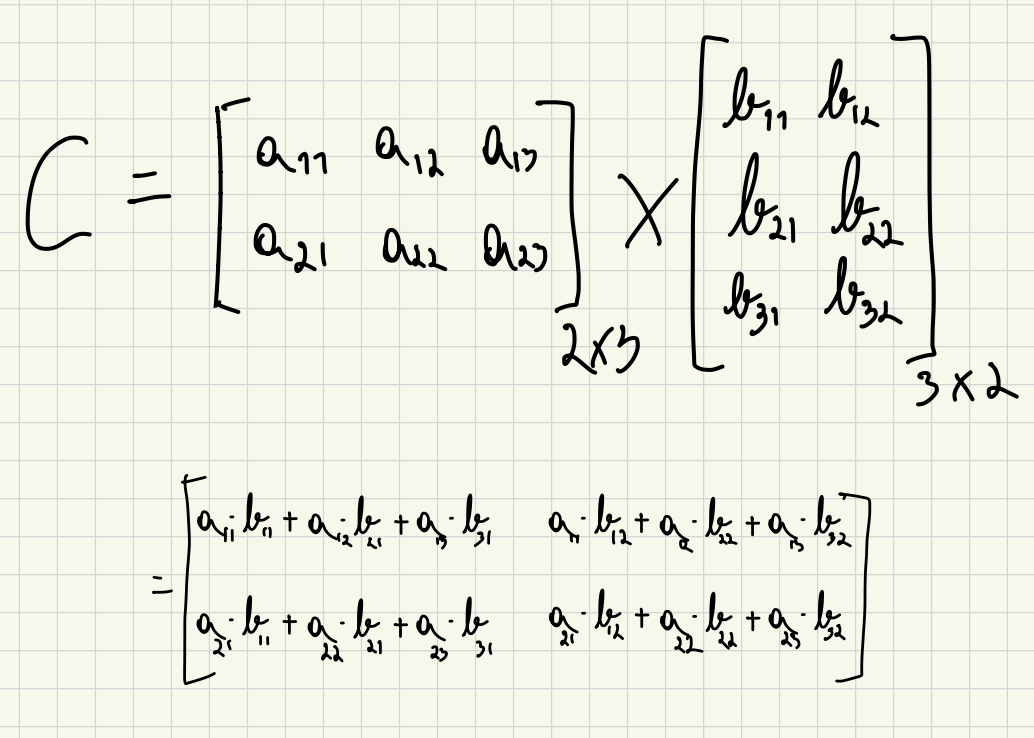

np.matmul can help with the calculation. Remember that AB is not equal as BA.

In [3]:
import numpy as np
A = np.array([[1,2],[2,1]])
B = np.array([[2,1],[1,2]])
E = A*B ##### Careful, this is an array multiplication
print(E)
C = np.matmul(A,B)
D = np.matmul(A,C)
print(D)

[[2 2]
 [2 2]]
[[14 13]
 [13 14]]


In [4]:
A = np.array([[1,-2,1],[2,1,3]])
B = np.array([[2,1],[3,2],[1,1]])
C = np.matmul(A,B)
D = np.matmul(B,A)
print(C)
print(D)

[[-3 -2]
 [10  7]]
[[ 4 -3  5]
 [ 7 -4  9]
 [ 3 -1  4]]


### Linear Trasnformation

Imagine a [0,1],[1,0] matrix:

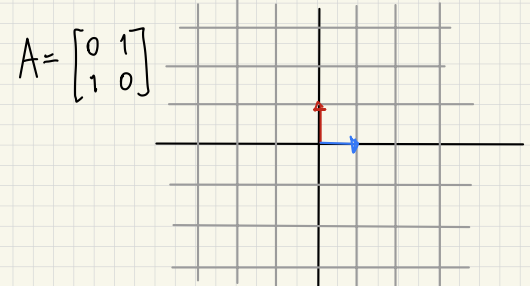

Any Linear Transformation will follow the grid created by the orthogonal vectors.

If a matrix is given as [0,1],[1,1], the grid will be different, this can be interpreted as how the matrix "moves".

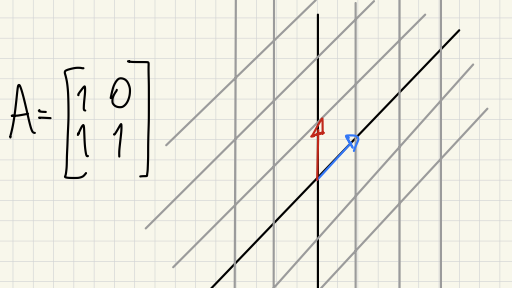

### Determinant
Determinant is a scalar value that represents the matrix. It is a useful tool to understand if the matrix has an inverse. One way to conceptualize the determinant is as the area/volume of the parallelogram/parallelepiped that the vectors of the matrix represents.

For a 2x2 matrix A = [[a, b], [c, d]], the determinant is given by det(A) = ad - bc.
For a 3x3 matrix A = [[a, b, c], [d, e, f], [g, h, i]],, we can choose a row and and use the following formula:
Det(A) = a (ei − fh) − b (di − fg) + c (dh − eg)

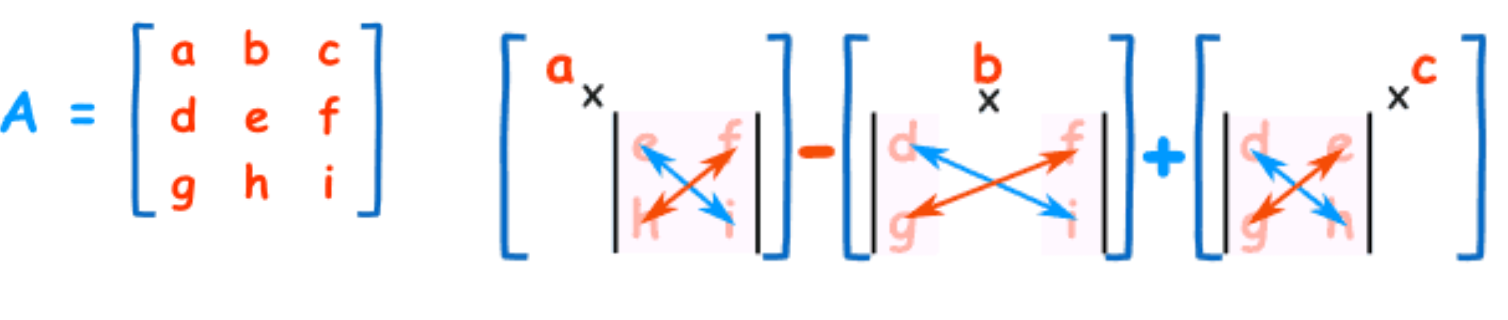

**Example**:

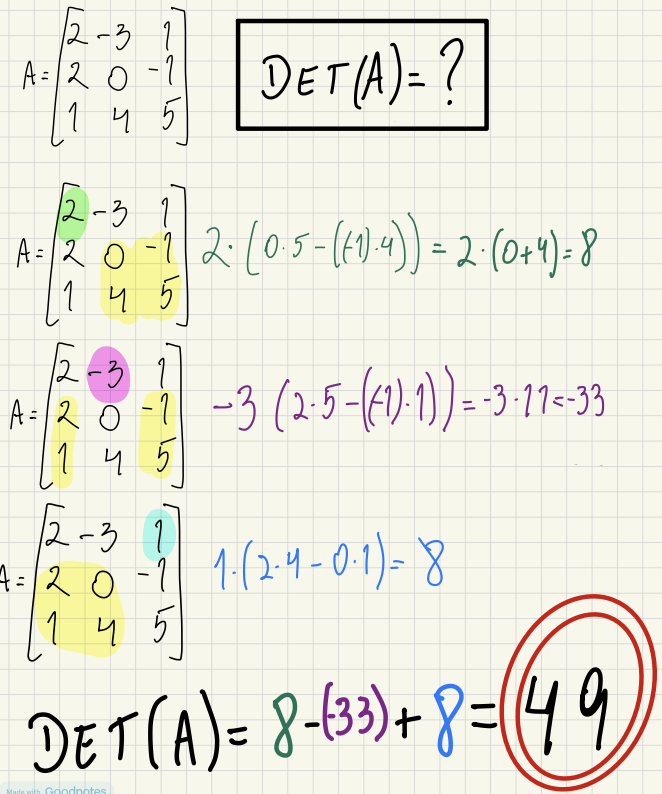


In [5]:
# calculate determinant using python package
A = np.array([[2,-3,1],[2,0,-1],[1,4,5]])
det = np.linalg.det(A)
print(det)

49.000000000000014


In [ ]:
# calculate determinant without using python package
def determinant(matrix):
    # Base case: If the matrix is 1x1, return the single element as determinant
    if len(matrix) == 1:
        return matrix[0][0]
    
    # Base case: If the matrix is 2x2, calculate the determinant directly
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    
    det = 0
    # Expand along the first row to calculate determinant
    for j in range(len(matrix)):
        # Calculate the minor matrix by removing the first row and j-th column
        minor = [row[:j] + row[j+1:] for row in matrix[1:]]
        # Calculate the determinant recursively for the minor matrix and sum them up
        det += (-1) ** j * matrix[0][j] * determinant(minor)
    
    return det


In [ ]:
arr = [[2,-3,1],[2,0,-1],[1,4,5]]
determinant(arr)

### Rank of a Matrix
Rank of a matrix can be used to understand how many rows/columns are unique.The rank of a matrix is also closely related to the determinant of the matrix. Specifically, a matrix is invertible if and only if its determinant is non-zero, which is equivalent to its rank being equal to its size.

**Example:**
Matrix A has two rows/columns:

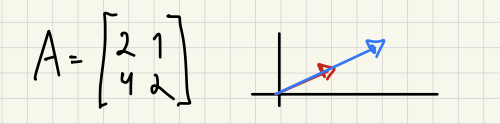

Even though, there is 2 rows, they are linear dependent. So the Rank of this matrix is 1.


In [6]:
# calculate rank of a matrix using python package
import numpy as np
A = np.array([[2,1],[4,2]])
rank = np.linalg.matrix_rank(A)
print(rank)

1


In [ ]:
# calculate rank of a matrix without using python package
def rank(matrix):
    # Gaussian elimination to reduce the matrix to row echelon form
    for i in range(len(matrix)):
        # Check if the diagonal element is nonzero
        if matrix[i][i] != 0:
            # Make all elements below the diagonal zero
            for j in range(i + 1, len(matrix)):
                ratio = matrix[j][i] / matrix[i][i]
                for k in range(len(matrix[i])):
                    matrix[j][k] -= ratio * matrix[i][k]
        else:
            # Swap rows if diagonal element is zero
            for k in range(i + 1, len(matrix)):
                if matrix[k][i] != 0:
                    matrix[i], matrix[k] = matrix[k], matrix[i]
                    break

    # Count the number of nonzero rows, which is the rank of the matrix
    rank = sum(1 for row in matrix if any(row))
    return rank

In [ ]:
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
print("Rank of the matrix:", rank(matrix))

### Row Echolon Form to Find Rank (and solve linear equations)
Simple row transformations can be used to represent a matrix in their simplest versions (Row Echolon Form)

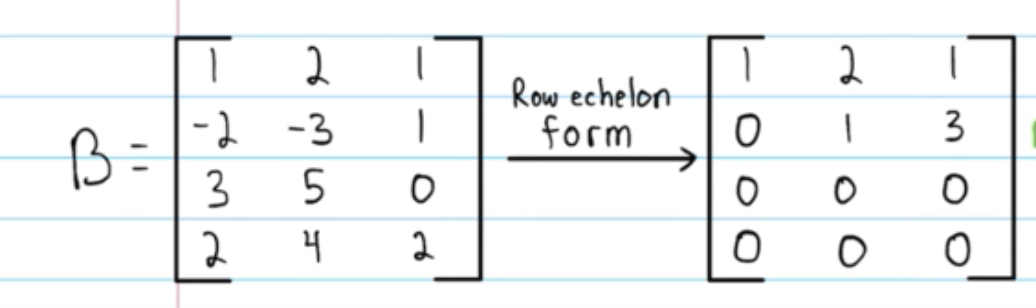

The number of non-zero rows represents the rank of the matrix. Rank(B) = 2

In [8]:
# convert the matrix to row echelon form
from sympy import * 
A = Matrix([[1,2,1],[-2,-3,1],[3,5,0],[2,4,2]])
print(A)
B = A.rref()
print(B)

Matrix([[1, 2, 1], [-2, -3, 1], [3, 5, 0], [2, 4, 2]])
(Matrix([
[1, 0, -5],
[0, 1,  3],
[0, 0,  0],
[0, 0,  0]]), (0, 1))


In [9]:
import numpy as np
A = np.array([[1,2,1],[-2,-3,1],[3,5,0],[2,4,2]])
print(np.linalg.matrix_rank(A))

2


### Transpose
The transpose of a matrix is the matrix with i and j coordinates flipped.

If:

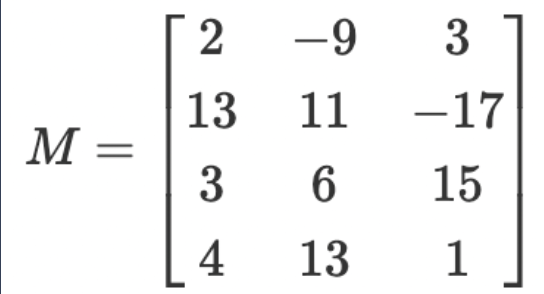

Then:

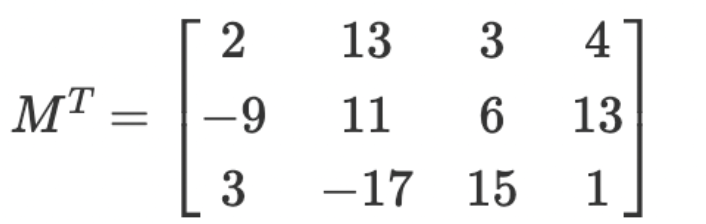

In [10]:
import numpy as np
matrix = np.array([[1, 2], [3, 4]])
transpose_matrix = np.transpose(matrix)
transpose_of_transpose = np.transpose(transpose_matrix)
print("Original matrix:\n", matrix)
print("Transpose matrix:\n", transpose_matrix)
print("Transpose of transpose matrix:\n", transpose_of_transpose)

Original matrix:
 [[1 2]
 [3 4]]
Transpose matrix:
 [[1 3]
 [2 4]]
Transpose of transpose matrix:
 [[1 2]
 [3 4]]


### Inverse
The inverse of a square matrix A is another matrix A^-1 that, when multiplied by A, gives the identity matrix I.

More formally, for a square matrix A, its inverse A^-1 is defined as:

A * A^-1 = A^-1 * A = I

where I is the identity matrix of the same size as A.

Not all square matrices have inverses, and a square matrix A has an inverse if and only if its determinant is nonzero. In that case, the inverse can be found using a formula that involves the determinant and the adjugate (also known as the classical adjoint) of A.

The adjugate of a matrix A, denoted adj(A), is the transpose of the matrix of cofactors of A, where the cofactor of an element a_ij is (-1)^(i+j) times the determinant of the submatrix obtained by deleting the i-th row and j-th column of A.

The formula for the inverse of A is then:

A^-1 = (1/det(A)) * adj(A)

where det(A) is the determinant of A.

The inverse of a matrix has many important applications, such as solving systems of linear equations, finding eigenvectors and eigenvalues, and diagonalizing matrices.

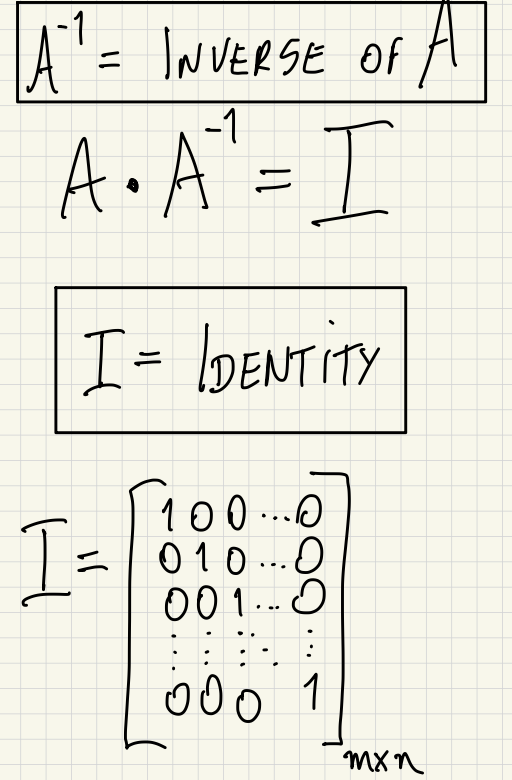

To calculate the inverse you need to use the following formulas:

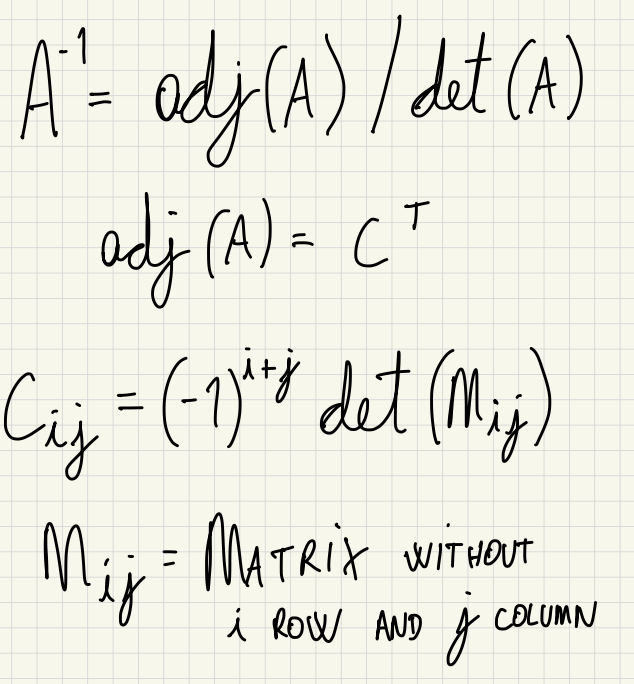

**Example 2x2**

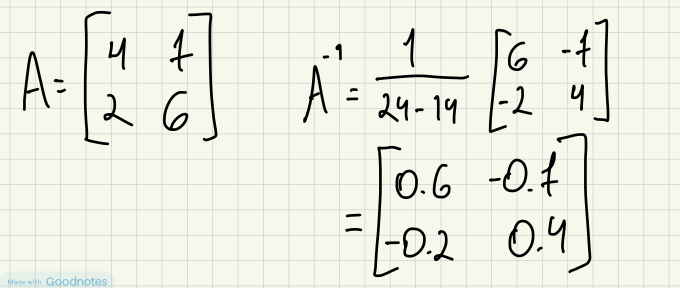




In [11]:
A = np.array([[4,7],[2,6]])
AInv = np.linalg.inv(A)
print(AInv)

[[ 0.6 -0.7]
 [-0.2  0.4]]


**Example 3x3**

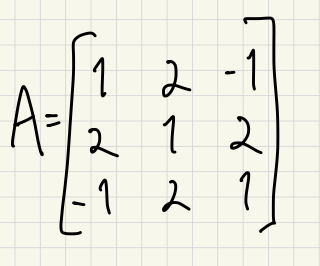

First let's calculate C:

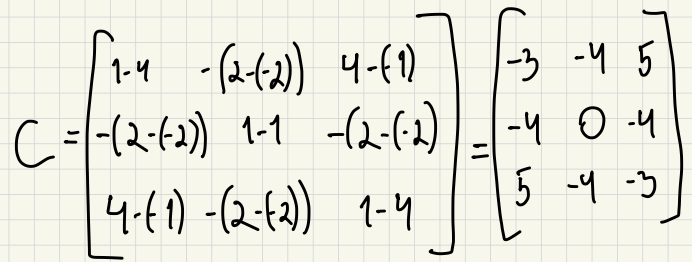

C^T:

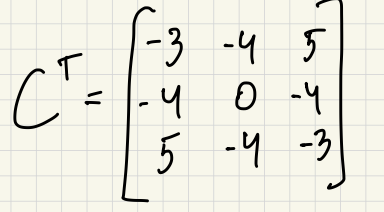

Inverse:

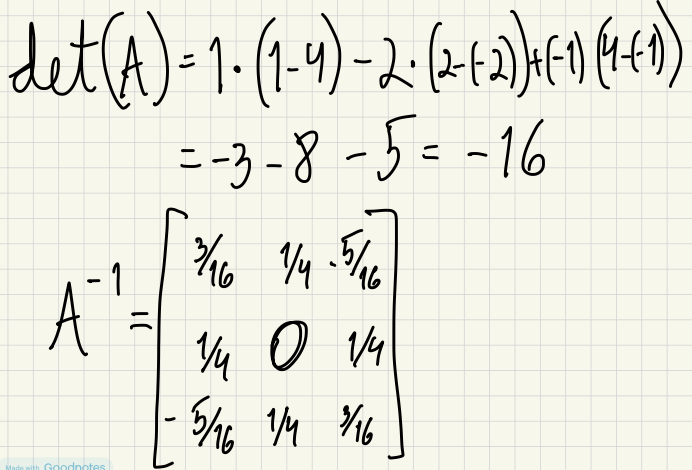


In [12]:
A = np.array([[1,2,-1],[2,1,2],[-1,2,1]])
AInv = np.linalg.inv(A)
print(AInv)

[[ 0.1875  0.25   -0.3125]
 [ 0.25    0.      0.25  ]
 [-0.3125  0.25    0.1875]]
